In [1]:
#ESCRIBIR EN EL DOCUMENTO
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# IMPORTANDO LOS DATOS

In [2]:
#data = pd.read_csv()
#Se Importa La priemera Hoja
data1 = pd.read_excel("Documentacion_DRP.xlsx", )

-------------

# ANALISIS DESCRIPTIVO DATA 1

In [3]:
data1.head(2) #Muestra los Registros iniciales indicados

,Negocio,Vertical,Procesos identificados,Impacto Financiero,Impacto Operacional,Impacto Legal,Impacto Reputacional,Total,Nivel,BIA,Fecha Creacion,Fecha Actualización
0,ComeRico,Pagos y Fraude,Fraude,2,1,3,1,7,Menor,Si,2021-12-14,2022-12-14
1,ComeRico,Pagos y Fraude,Pago Usuarios,4,5,2,3,14,Mayor,Si,2021-12-14,2022-12-14


In [4]:
#Analizando si hay datos nulos y el tipo de formato
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Negocio                 129 non-null    object        
 1   Vertical                129 non-null    object        
 2   Procesos identificados  129 non-null    object        
 3   Impacto Financiero      129 non-null    int64         
 4   Impacto Operacional     129 non-null    int64         
 5   Impacto Legal           129 non-null    int64         
 6   Impacto Reputacional    129 non-null    int64         
 7   Total                   129 non-null    int64         
 8   Nivel                   129 non-null    object        
 9   BIA                     129 non-null    object        
 10  Fecha Creacion          129 non-null    datetime64[ns]
 11  Fecha Actualización     129 non-null    datetime64[ns]
dtypes: datetime64[ns](2), int64(5), object(5)
memory u

In [5]:
#CONOCIENDO LOS DATOS

#data1["Negocio"].unique()
#data1["Vertical"].unique()
#data1["Procesos identificados"].unique()
#data1["Nivel"].unique()
#data1["BIA"].unique() #Business Impact Analysis

-------------

## Analisis COMERICO

### DATOS POR NIVEL DE AMENAZA

In [6]:
data1.columns

Index(['Negocio', 'Vertical', 'Procesos identificados', 'Impacto Financiero',
       'Impacto Operacional', 'Impacto Legal', 'Impacto Reputacional',
       'Total ', 'Nivel', 'BIA', 'Fecha Creacion', 'Fecha Actualización '],
      dtype='object')

In [7]:
comeRico = data1[data1["Negocio"]=="ComeRico"]

## Frecuencias por nivel de riesgos

Text(0, 0.5, 'Número de eventos')

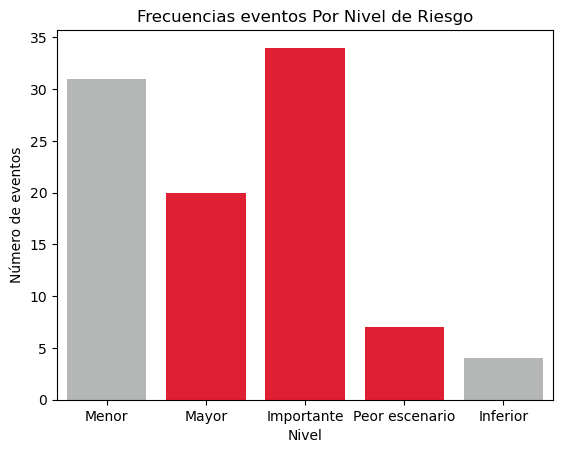

In [8]:
sns.countplot(data=comeRico, x= "Nivel", palette=["#b4b7b5", "#ff001a", "#ff001a", "#ff001a","#b4b7b5"])
plt.title("Frecuencias eventos Por Nivel de Riesgo")
plt.ylabel("Número de eventos")

------------

## ANALIZANDO LOS DATOS CON NIVELES DE MAYOR IMPORTANCIA (Mayor, Importante, Peor escenario)

In [9]:
mayor_riesgo = comeRico[(comeRico["Nivel"]=="Mayor") | (comeRico["Nivel"]=="Importante") | (comeRico["Nivel"]=="Peor escenario")]
mayor_riesgo.head(2) #Se muestran los dos primeros regitros

#mayor_riesgo["Procesos identificados"].value_counts() #Se producen muchas caracteristicas NO GRAFICABLE

,Negocio,Vertical,Procesos identificados,Impacto Financiero,Impacto Operacional,Impacto Legal,Impacto Reputacional,Total,Nivel,BIA,Fecha Creacion,Fecha Actualización
1,ComeRico,Pagos y Fraude,Pago Usuarios,4,5,2,3,14,Mayor,Si,2021-12-14,2022-12-14
2,ComeRico,Pagos y Fraude,Pago Rt’s,1,3,2,3,9,Importante,Si,2021-12-14,2022-12-14


In [10]:
#Procesos con mayor IMPACTO AL NEGOCIO
mayor_riesgo["Procesos identificados"].value_counts() #Aparece 1 por cada item no se puede hacer Top

Pago Usuarios                                                1
Modificacion de usuario                                      1
Eliminar usuarios deshabilitados en Gsuite                   1
Gestión de incidentes                                        1
Atención de solicitudes                                      1
                                                            ..
Gestion y administracion de WAF                              1
Gestion y administracion de conectividad con terceros Pay    1
Gestión de Vulnerabilidades                                  1
Análisis de Vulnerabilidades                                 1
Calculo de PM                                                1
Name: Procesos identificados, Length: 61, dtype: int64

-------

## Areas con mayores incidentes de seguridad

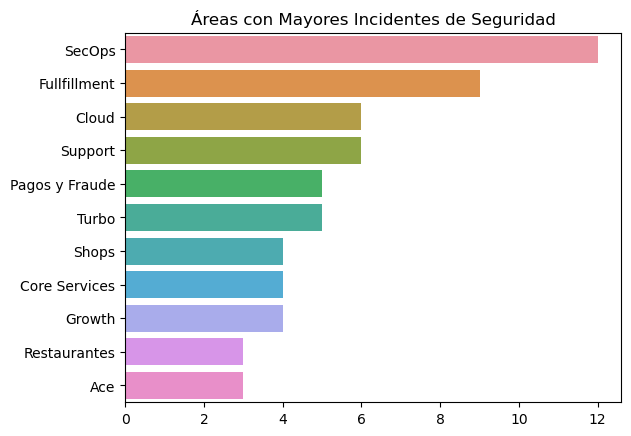

In [11]:
sns.countplot(data=mayor_riesgo, y="Vertical", 
              order = mayor_riesgo["Vertical"].value_counts().index,)
plt.title("Áreas con Mayores Incidentes de Seguridad")
plt.xlabel("")
plt.ylabel(None)
plt.show()

--------------

## Media Aritmetica por Impactos

C:\Users\Arley\AppData\Local\Temp\ipykernel_2784\4194150116.py:3: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  y_data = mayor_riesgo.mean().tolist()[0:4] # Media por impacto
C:\Users\Arley\AppData\Local\Temp\ipykernel_2784\4194150116.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  y_data = mayor_riesgo.mean().tolist()[0:4] # Media por impacto


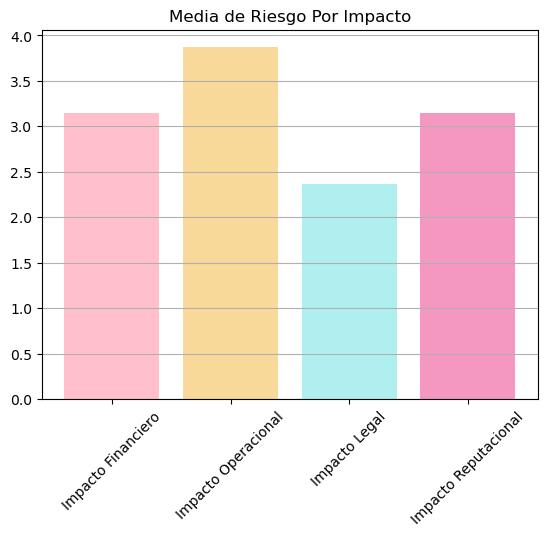

In [12]:
#Media de riesgo por cada Impacto
x_data = mayor_riesgo.columns[3:7].tolist() #Nombres de las columnas por indices
y_data = mayor_riesgo.mean().tolist()[0:4] # Media por impacto

fig, ax = plt.subplots()
ax.bar(x_data, y_data, color=["#FFC0CB","#f9d99a", "#B0EFEF","#F498C2"])
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.title("Media de Riesgo Por Impacto")
plt.show()

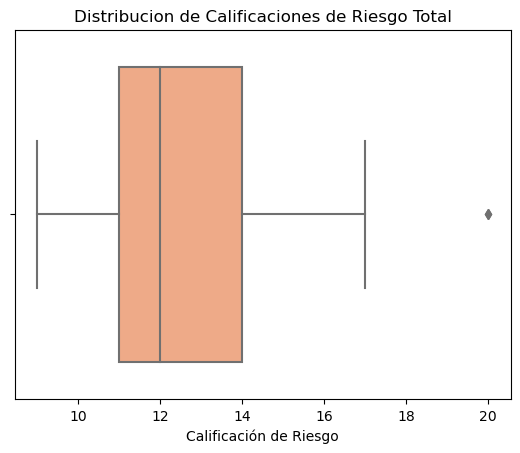

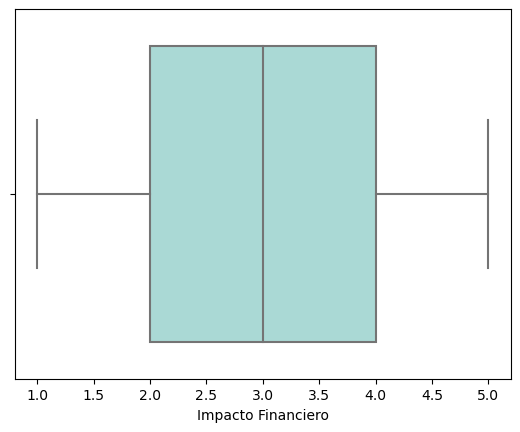

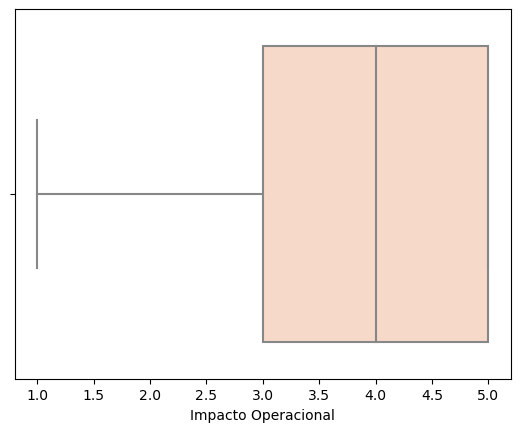

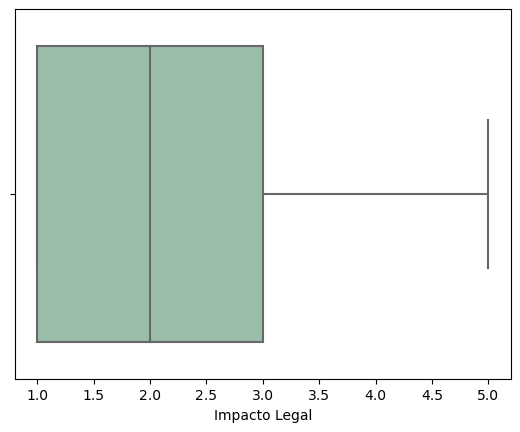

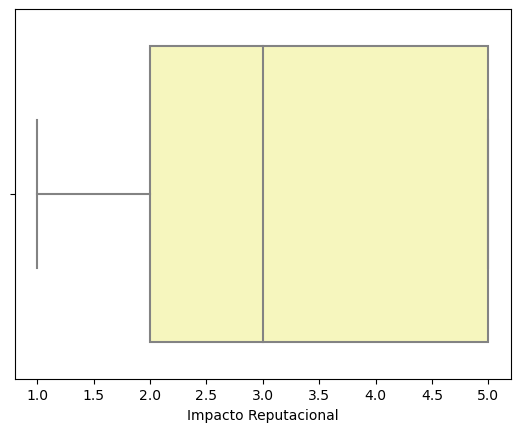

In [13]:
#Distribucion y datos comunes en calificaciones de Riesgo
#Segmentación por negocios

sns.boxplot(x="Total ", color="#FFA477", data=mayor_riesgo)
plt.title("Distribucion de Calificaciones de Riesgo Total")
plt.xlabel("Calificación de Riesgo")
plt.show()

sns.boxplot(x="Impacto Financiero", color="#A2E1DB", data=mayor_riesgo)
plt.show()

sns.boxplot(x="Impacto Operacional", color="#FED7C3", data=mayor_riesgo)
plt.show()

sns.boxplot(x="Impacto Legal", color="#97C1A9", data=mayor_riesgo)
plt.show()

sns.boxplot(x="Impacto Reputacional", color="#FFFFB5", data=mayor_riesgo)
plt.show()

-------------------

----------

# Analisis COMERICOPAY

### DATOS POR NIVEL DE AMENAZA

In [14]:
comerRicoPay = data1[data1["Negocio"]=="ComerRicoPay"]

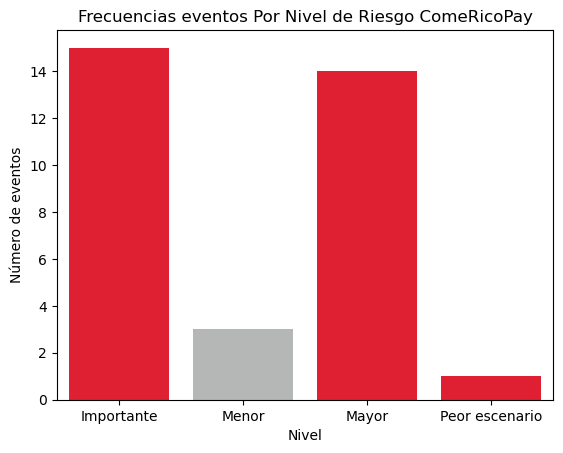

In [15]:
#Notar que Aca no aparece la categoria Inferior como nivel de riesgo
sns.countplot(data=comerRicoPay, x= "Nivel", palette=["#ff001a","#b4b7b5", "#ff001a", "#ff001a"])
plt.title("Frecuencias eventos Por Nivel de Riesgo ComeRicoPay")
plt.ylabel("Número de eventos")
plt.show()

------------

## ANALIZANDO LOS DATOS CON NIVELES DE MAYOR IMPORTANCIA (Mayor, Importante, Peor escenario)

In [16]:
mayor_riesgo = comerRicoPay[(comerRicoPay["Nivel"]=="Mayor") | (comerRicoPay["Nivel"]=="Importante") | (comerRicoPay["Nivel"]=="Peor escenario")]
mayor_riesgo.head(2) #Se muestran los dos primeros regitros

,Negocio,Vertical,Procesos identificados,Impacto Financiero,Impacto Operacional,Impacto Legal,Impacto Reputacional,Total,Nivel,BIA,Fecha Creacion,Fecha Actualización
96,ComerRicoPay,Customer Experience,Internal tools,2,4,1,2,9,Importante,Si,2021-10-11,2022-10-11
97,ComerRicoPay,Customer Experience,rpp-inventory-manager,1,4,2,2,9,Importante,Si,2021-10-11,2022-10-11


In [17]:
#Procesos con mayor IMPACTO AL NEGOCIO
mayor_riesgo["Procesos identificados"].value_counts() #Aparece 1 por cada item no se puede hacer Top

Internal tools            1
rpp-inventory-manager     1
Cuotas                    1
Rewards                   1
Card Payment              1
Wallet Integrations       1
rpp-card-movements        1
Card Basics               1
rpp-wallet-home           1
rpp-security              1
rpp-fraud                 1
rpp-risk                  1
rda                       1
rpp-signup-kyc            1
rpp-signup--onboarding    1
Reporteria general        1
Core Integration          1
ComeRico-bus-ibk          1
rpp-integration-dvv       1
rpp-banking-core          1
rpp-cashflow              1
rpp-account-basics        1
rpp-card-processor        1
rpp-autorizador           1
rpp-gateway               1
rpp-payment-methods       1
Card Payments             1
Centralize Checkout       1
Aclaraciones              1
Bill Payments             1
Name: Procesos identificados, dtype: int64

--------

## Areas con Mayores Incidentes de seguridad

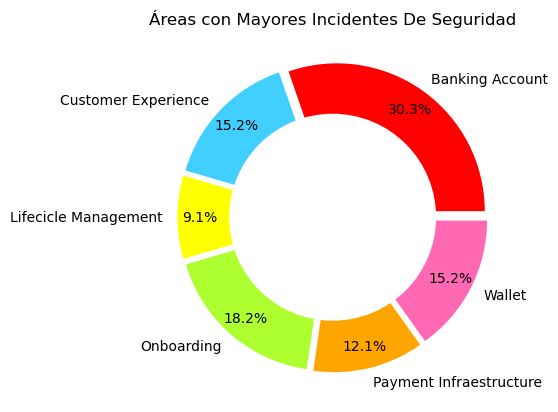

In [18]:
##GRAFICO DE ANILLOS

#Datos
etiquetas = np.unique(comerRicoPay["Vertical"], return_counts=True)[0]
valores = np.unique(comerRicoPay["Vertical"], return_counts=True)[1]
  
# configuraciones
colors = ['#FF0000', '#40cfff', '#FFFF00', 
          '#ADFF2F', '#FFA500', '#ff69b4']
explode = (0.05, 0.05, 0.05, 0.05, 0.05, 0.05)
  
# Grafico de Pastel
plt.pie(valores, colors=colors, labels=etiquetas,
        autopct='%1.1f%%', pctdistance=0.85,
        explode=explode)
  
# Agregando el circulo Blanco en la Mitad
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Áreas con Mayores Incidentes De Seguridad')
plt.show()

--------

## Media aritmetica de Riesgo por Impacto

C:\Users\Arley\AppData\Local\Temp\ipykernel_2784\49603988.py:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  y_data = mayor_riesgo.mean().tolist()[0:4] # Media por impacto
C:\Users\Arley\AppData\Local\Temp\ipykernel_2784\49603988.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  y_data = mayor_riesgo.mean().tolist()[0:4] # Media por impacto


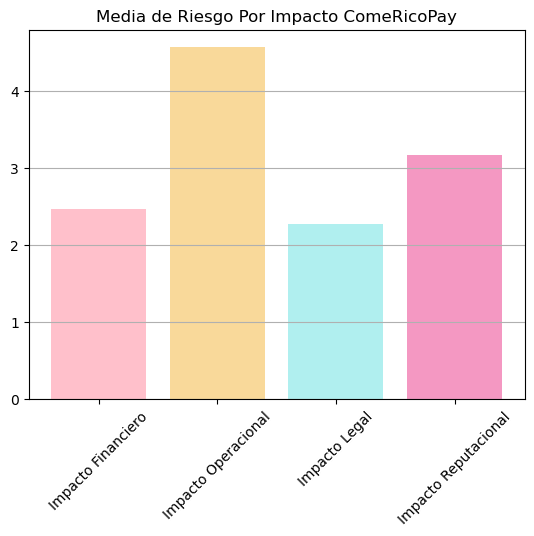

In [19]:
x_data = mayor_riesgo.columns[3:7].tolist() #Nombres de las columnas por indices
y_data = mayor_riesgo.mean().tolist()[0:4] # Media por impacto

fig, ax = plt.subplots()
ax.bar(x_data, y_data, color=["#FFC0CB","#f9d99a", "#B0EFEF","#F498C2"])
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.title("Media de Riesgo Por Impacto ComeRicoPay")
plt.show()

--------

## Distribucion en calificaciones de Riesgo

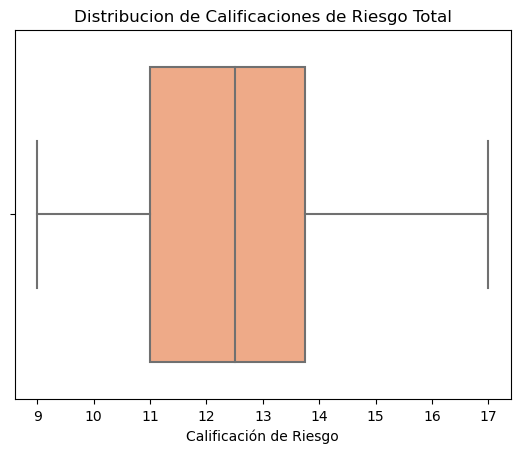

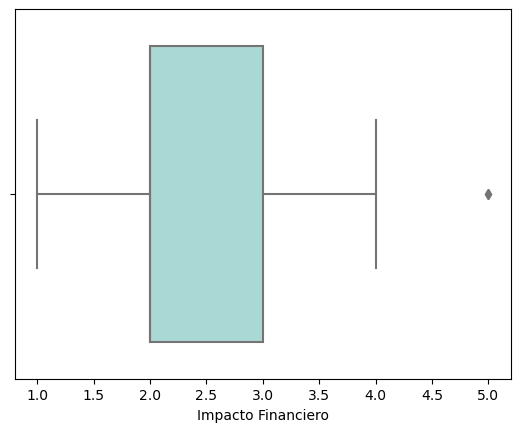

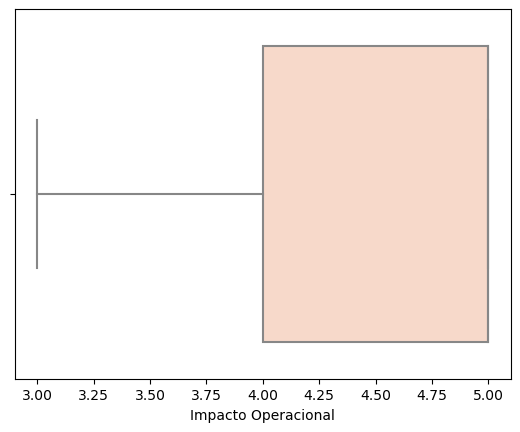

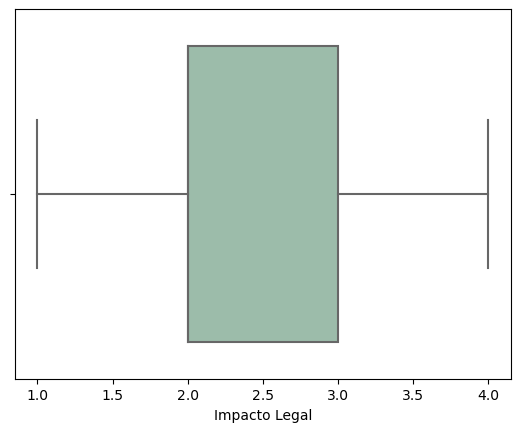

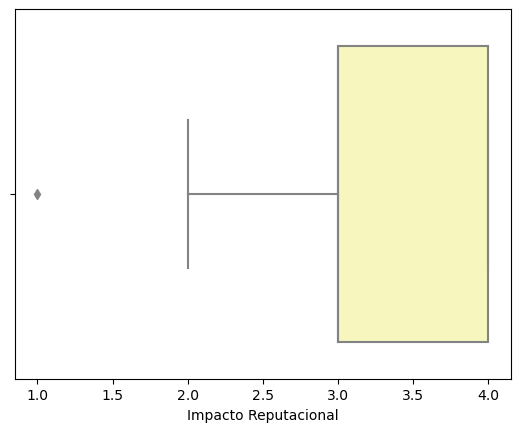

In [20]:
#Distribucion en calificaciones de Riesgo
#Segmentación por negocios

sns.boxplot(x="Total ", color="#FFA477", data=mayor_riesgo)
plt.title("Distribucion de Calificaciones de Riesgo Total")
plt.xlabel("Calificación de Riesgo")
plt.show()

sns.boxplot(x="Impacto Financiero", color="#A2E1DB", data=mayor_riesgo)
plt.show()

sns.boxplot(x="Impacto Operacional", color="#FED7C3", data=mayor_riesgo)
plt.show()

sns.boxplot(x="Impacto Legal", color="#97C1A9", data=mayor_riesgo)
plt.show()

sns.boxplot(x="Impacto Reputacional", color="#FFFFB5", data=mayor_riesgo)
plt.show()

-------------------